In [1]:
library(ggplot2)
library("dplyr")
library(viridis)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



ERROR: Error in library(viridis): there is no package called ‘viridis’


In [5]:
path1 = '/gladstone/engelhardt/pelka-collaboration/HuColonCa-FFPE-ImmuOnco-LH_VMSC02001_20220427/baysor_20231207/baysor_res_merged/segmentation_cell_stats.csv.gz'
metadata = read.csv(gzfile(path1))

location = cbind(metadata$x, metadata$y)
location1 = as.matrix(location)

idx1 = read.csv("data/cellidx_baysor1.csv")[,1]

location1 = location1[idx1,]

path2 = '/gladstone/engelhardt/pelka-collaboration/HumanColonCancerPatient1/cell_metadata.csv'
metadata = read.csv(path2, row.names = 1)

location = metadata[,c('center_x','center_y')]
location2 = as.matrix(location)

idx2 = read.csv("data/cellidx_patient1.csv")[,1]

location2 = location2[order(as.numeric(rownames(metadata))),]
location2 = location2[idx2,]

path2 = '/gladstone/engelhardt/pelka-collaboration/HumanColonCancerPatient2/cell_metadata.csv'
metadata = read.csv(path2, row.names = 1)

location = metadata[,c('center_x','center_y')]
location3 = as.matrix(location)

idx3 = read.csv("data/cellidx_patient2.csv")[,1]

location3 = location3[order(as.numeric(rownames(metadata))),]
location3 = location3[idx3,]

In [6]:
# get the genes
path1 = '/gladstone/engelhardt/pelka-collaboration/HuColonCa-FFPE-ImmuOnco-LH_VMSC02001_20220427/baysor_20231207/baysor_res_merged/cell_by_gene.csv.gz'
count = read.csv(gzfile(path1))
count1 = as.matrix(count)
genes = colnames(count)

In [7]:
r1 = range(location1[,1])
r2 = range(location1[,2])

In [10]:
(r1[2] - r1[1])*(r2[2] - r2[1])/nrow(count)

[1] 9181.441

In [13]:
# load("modelssaved/three_sample_f20_s5K_l500_norm_i1000.RData")

load("modelssaved/three_sample_f20_s10K_l100_norm_baysor.RData")

In [14]:
# Weighting from paper
dat = t(out$signatures)
dat_new=NULL
for(ii in 1:nrow(dat)){
  rr=dat[ii,]
  m1=max(rr)
  m2=max(rr[-which(rr==m1)])
  mm=rep(m1, length(rr))
  mm[which(rr==m1)]=m2
  ns=rr*log((rr+1e-10)/(mm+1e-10))
  dat_new=rbind(dat_new, ns)
}

weight_topgene = NULL
ng = 50
for(topic in 1:ncol(dat)){
    idx = order(dat_new[,topic], decreasing = T)
    weighting = genes[idx[1:ng]]

    weight_topgene = rbind(weight_topgene,c(topic,weighting))

}
write.csv(data.frame(t(weight_topgene)), "resultplots/topgenes_ts_baysor_l100_norm.csv", row.names=FALSE)
weight_topgene[,1:18]

[,1] [,2]     [,3]     [,4]    [,5]     [,6]   [,7]    [,8]     [,9]  
 [1,] 1    EPCAM    CDH1     ERBB2   MUC1     ERBB3  IFNGR1  SPRY2    KRAS  
 [2,] 2    FOS      EGR1     DUSP1   PLA2G2A  JUNB   JUN     ATF3     IGF1  
 [3,] 3    PLVAP    VWF      DES     COL4A1   ACTA2  ENG     MYH11    KDR   
 [4,] 4    MUC2     SERPINA1 MMP1    S100A9   NOS2   DUSP6   BAK1     IL23A 
 [5,] 5    PKM      LMNA     LDHA    KLRC1    CCR3   TSC2    XCL1     IL13  
 [6,] 6    LGR5     RGMB     EPHB3   CLCA1    NOTCH1 SMOC2   TP53     IDH1  
 [7,] 7    TGFBI    CTNNB1   SMAD2   PIK3CA   MSH3   PRKCA   BMI1     TSC1  
 [8,] 8    LAMC2    EPHA2    LAMB3   BCL2L1   ZBED2  GPX3    CCND1    MET   
 [9,] 9    VEGFA    CEACAM1  DDIT3   TCF7L2   TNFSF9 CA7     ROS1     PPARD 
[10,] 10   HLA.B    CXCL10   TAP1    TAP2     IDO1   BST2    STAT1    TAPBP 
[11,] 11   COL1A1   FN1      COL5A1  MMP11    SFRP2  COL11A1 PDGFRA   PDGFRB
[12,] 12   C1QC     HLA.DRA  FCGR3A  HLA.DQA1 LYZ    CYBB    HLA.DPB1 CD14  
[13,] 13   NDUFA4L2 CA9      SLC26A3 LRP1     FZD7   TMEM37  NEDD4    PLOD2 
[14,] 14   SOX9     AXIN2    LGR6    YAP1     LRP5   ASCL2   CDKN1B   VTN   
[15,] 15   TRAC     GNLY     CD2     CD3E     GZMA   IL2RB   ZAP70    CCL5  
[16,] 16   SPP1     MMP9     MMP12   IL4I1    CCL2   MARCO   CCL8     CCR1  
[17,] 17   SOD2     CEBPB    HIF1A   NFKB1    CXCL1  NFKB2   CDKN1A   VEGFB 
[18,] 18   IL1B     SOCS3    CXCL8   PTGS2    CSF3R  FFAR2   NFKBIA   ITGAX 
[19,] 19   MZB1     CD79A    XBP1    POU2AF1  IRF4   FCRL5   DERL3    CD27  
[20,] 20   MKI67    PLK1     MCM2    BIRC5    FOXM1  PCNA    CCNB1    CDK2  
      [,10]    [,11]    [,12]  [,13]  [,14]   [,15]     [,16]  [,17]  [,18] 
 [1,] IGF1R    LRP6     AKT2   PTK2   NFE2L2  VTN       IL17A  IL13   PTGDR2
 [2,] CXCL12   PDK4     MMP2   KLF2   ROR1    IL5RA     IL17A  IL4    TGM2  
 [3,] MMRN2    ANGPT2   FLT4   CDH5   ADAMTS4 CAV1      PGF    ITGA1  PECAM1
 [4,] CD1B     CEACAM8  IL12A  PRTN3  MPO     CD160     CD1E   IL21   FGFBP2
 [5,] CD68     PTGDR2   TCL1A  IL21   IL10    PGLYRP1   FGFBP2 IDO2   IL22  
 [6,] EPHB4    RORC     EPHA4  FGFR3  SOX2    FGFR2     CCR6   TGFBR3 CCL28 
 [7,] APC      BRAF     TGFBR1 LEF1   TBK1    ATR       HDAC3  IFNAR1 TGFBR2
 [8,] ITGB1    EGFR     AMOTL2 FGF2   MMP7    FOSL1     TEAD1  PROX1  CD276 
 [9,] IKZF4    PMS2     CCL28  TBX10  FGF1    SLC13A3   CCL11  MMP2   NCAM1 
[10,] CXCL11   HLA.C    CX3CL1 LGALS9 CIITA   TNFSF10   TGFB2  LAMP3  CSF3  
[11,] SERPINE1 FGFR1    FBLN1  FAP    LOX     SMO       COL6A3 SNAI2  TSC2  
[12,] CSF1R    HLA.DRB1 MRC1   CD163  MAFB    CD4       CD209  CMKLR1 TREM2 
[13,] PKIB     TBX3     IL17A  TSC2   XCL1    IL13      CD68   TCL1A  IL10  
[14,] XCL1     IL13     TCL1A  IL10   KLRF1   TGM2      FGFBP2 CCL26  IDO2  
[15,] CXCR4    FOXP3    TIGIT  TRBC1  CTSW    CXCR6     PTPRC  CCR4   NKG7  
[16,] KIR3DL2  TNFRSF9  ELANE  TSC2   TCL1A   CCL1      FGFBP2 IDO2   IL22  
[17,] STAT3    KIT      RELA   TNC    SRC     CDK6      BRD4   JAK1   MAP2K1
[18,] ICAM1    PROK2    CXCR1  CD83   CCL3    IL6       CXCR2  IL3RA  IL6R  
[19,] VSIR     PDK1     CD79B  ICAM3  IFNAR2  TNFRSF13C ICAM2  CD19   MFAP5 
[20,] MYBL2    EZH2     CDCA7  MCM6   CDK4    AURKA     BRCA1  MSH2   E2F1

Warning message in data.row.names(row.names, rowsi, i):
“some row.names duplicated: 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,25

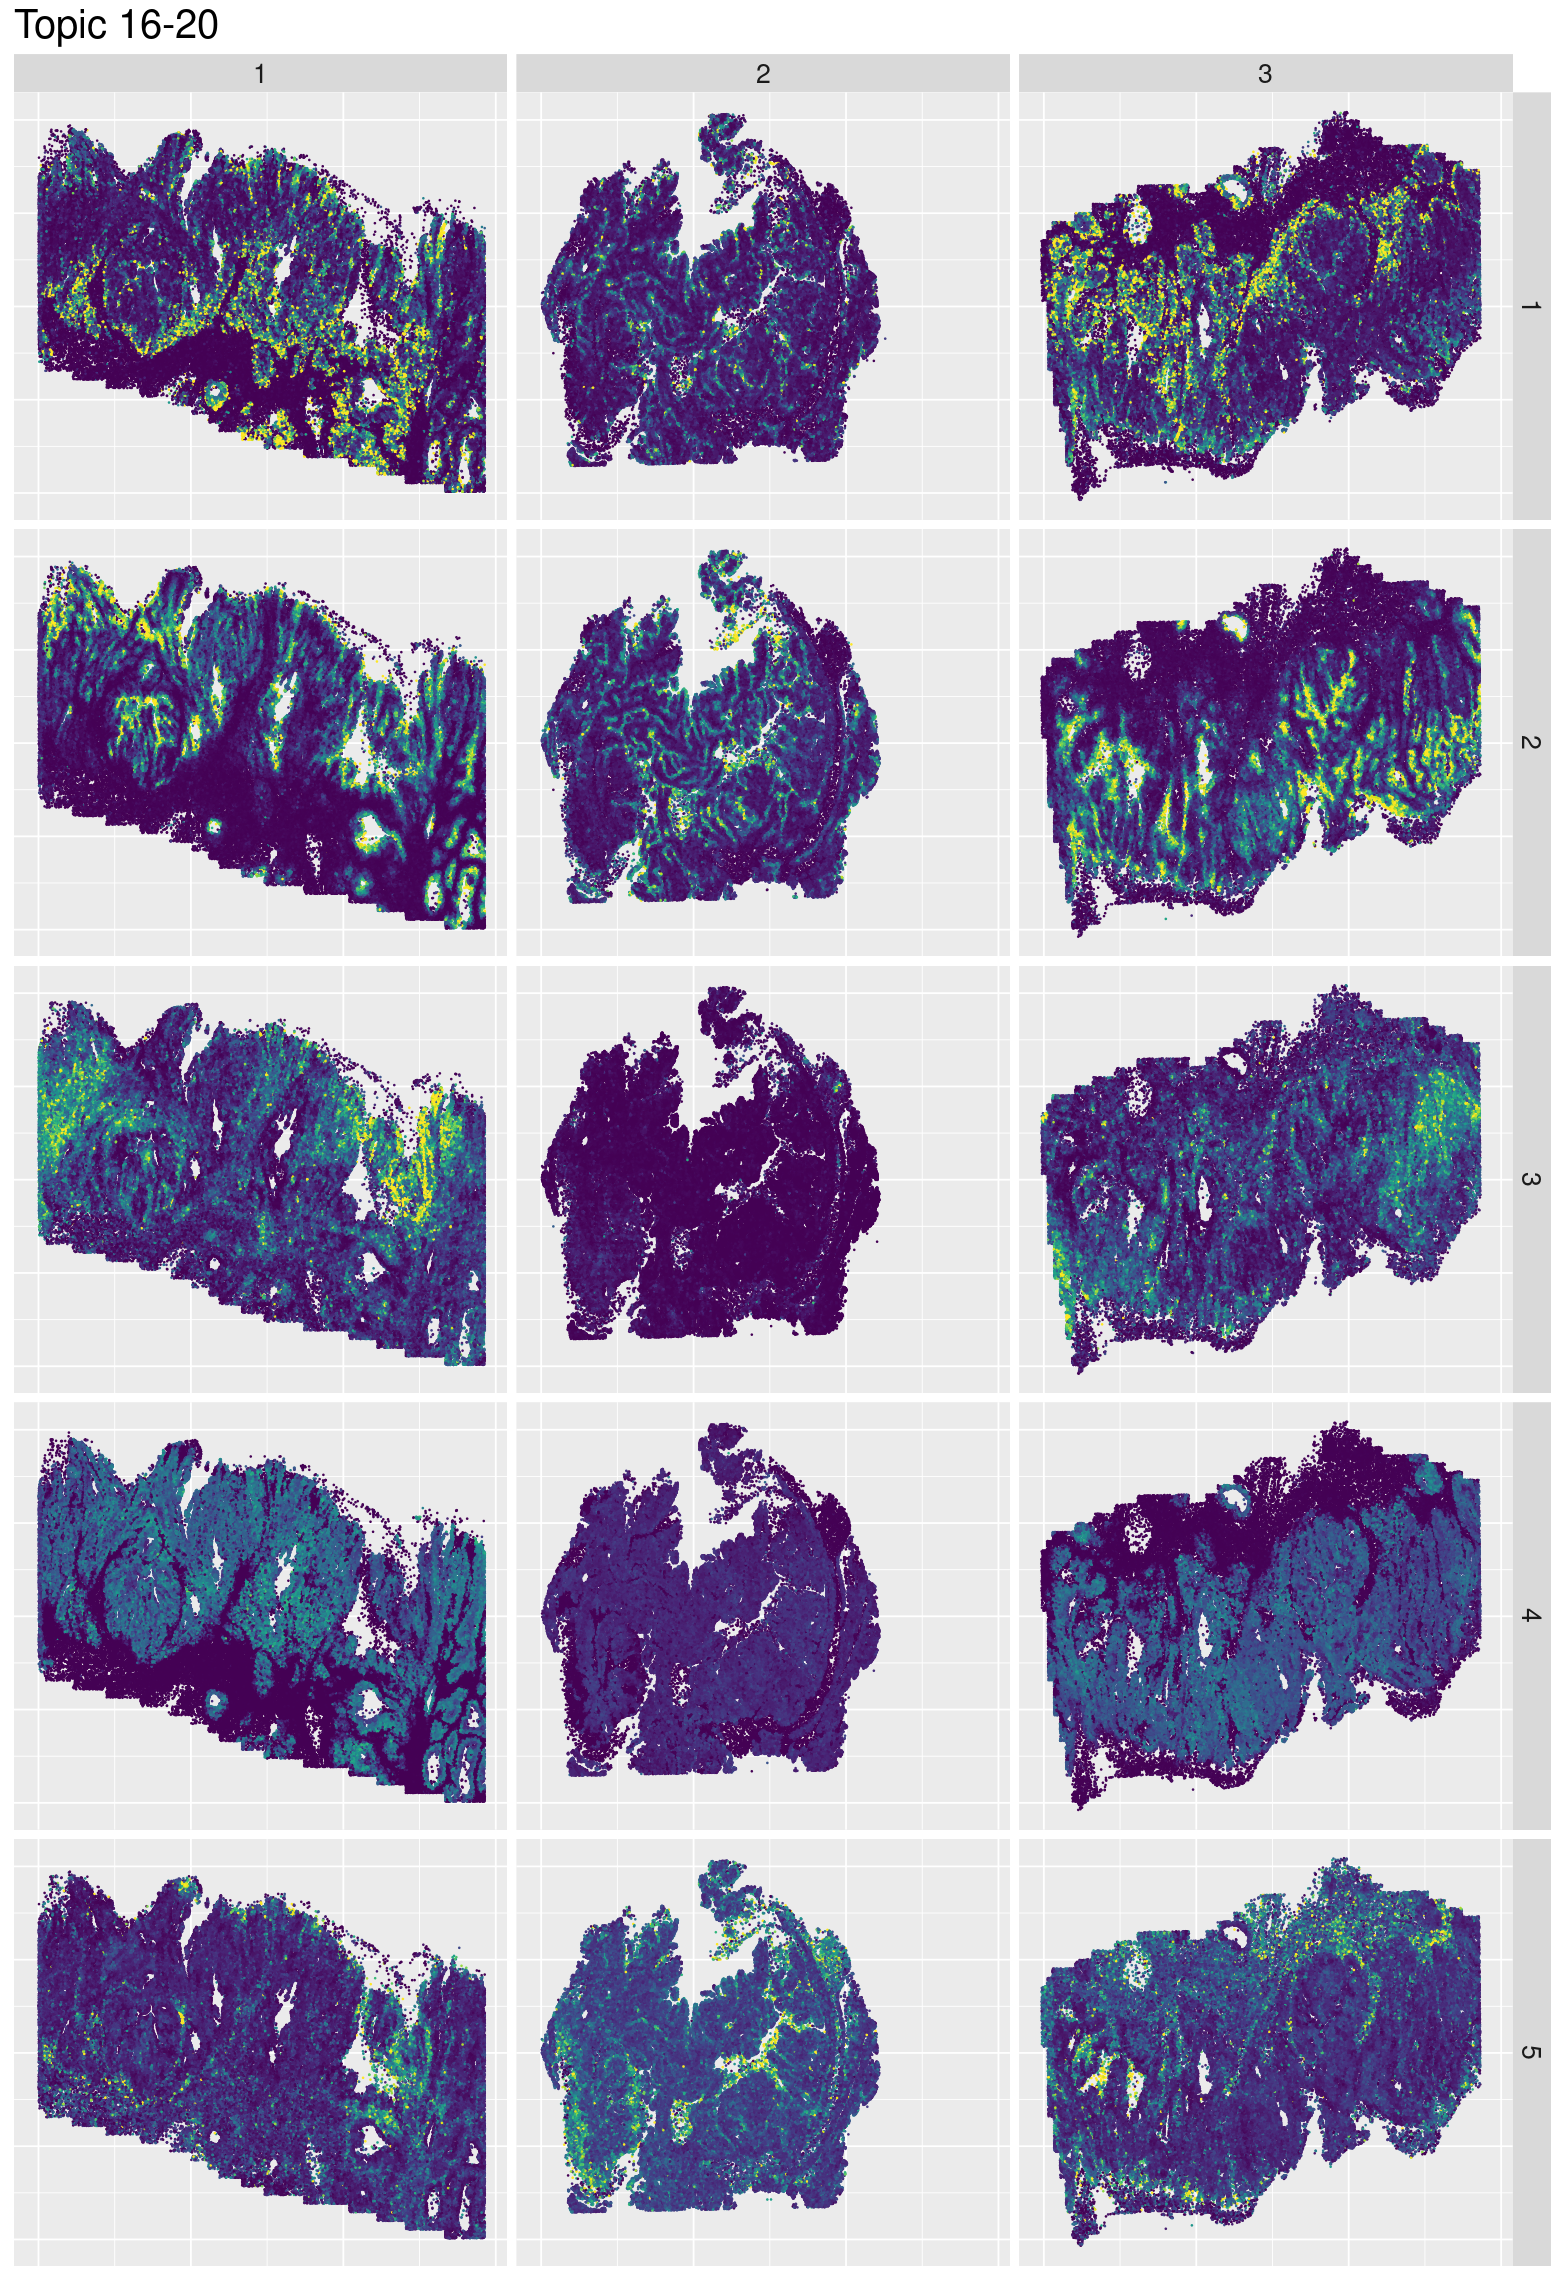

In [15]:
norm_exp = out$exposures/rowSums(out$exposures)
norm_exp = t(t(norm_exp)/colSums(norm_exp))

# Plot weights for a certain topic 
dat = data.frame(exp = norm_exp[,c(8,9,10,14,17)], name = c(rep(1,nrow(location1)),rep(2,nrow(location2)),rep(3,nrow(location3))), location = rbind(location1,location2*9.259,location3*9.259))

plotdat = reshape(dat, varying = colnames(dat)[c(1:5)], direction = 'long', v.names = "prob")

plot_idx = sample(1:nrow(plotdat),floor(nrow(plotdat)*0.2))

plotdat = plotdat[plot_idx,]

options(repr.plot.width=13, repr.plot.height=19)
plotdat$probq = plotdat$prob
qmax = quantile(plotdat$probq, 0.99)
plotdat$probq[plotdat$prob > qmax] = qmax

plotdat$location.center_y = -plotdat$location.center_y
ggplot(plotdat, aes(x = location.center_x, y = location.center_y, col = probq))+
        geom_point(cex = 0.1)+
        facet_grid(time~name)+
        theme(text = element_text(size = 20),
        legend.position = "none", 
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        axis.title = element_blank()
        )+
        scale_color_viridis()+
        ggtitle(paste0("Topic 16-20"))

In [ ]:
# More distinct genes
dat = t(out$signatures)
dat_new=NULL
for(ii in 1:nrow(dat)){
  rr=dat[ii,]
  m1=max(rr)
  m2=max(rr[-which(rr==m1)])
  mm=rep(m1, length(rr))
  mm[which(rr==m1)]=m2
  ns=rr/mm
  dat_new=rbind(dat_new, ns)
}

weight_topgene = NULL
ng = 18
for(topic in 1:20){
    idx = order(dat_new[,topic], decreasing = T)
    weighting = genes[idx[1:ng]]

    weight_topgene = rbind(weight_topgene,c(topic,weighting))

}

weight_topgene

## Violin plot for celltype 

In [1]:
# load data for celltype plot
path1 = '/gladstone/engelhardt/pelka-collaboration/HuColonCa-FFPE-ImmuOnco-LH_VMSC02001_20220427/baysor_20231207/baysor_res_merged/segmentation_cell_stats.csv.gz'
metadata = read.csv(gzfile(path1))

location = cbind(metadata$x, metadata$y)
location1 = as.matrix(location)

idx1 = read.csv("data/cellidx_baysor1.csv")[,1]

location1 = location1[idx1,]

In [2]:
path1 = '/gladstone/engelhardt/pelka-collaboration/HuColonCa-FFPE-ImmuOnco-LH_VMSC02001_20220427/baysor_20231207/20231212_public_singlecells_n16_baysor_geneformer_annos_kmeans15_nhoods_obs_only.csv'
celltype = read.csv(path1)
rownames(celltype) = celltype$cell_id

In [3]:
baysor_celltypeMid = celltype[as.character(metadata$cell_id[idx1]),'cl46Mid']

In [4]:
load("modelssaved/three_sample_f20_s10K_l10000_norm_baysor2.RData")

In [5]:
norm_exp = out$exposures[1:sum(idx1),]/rowSums(out$exposures[1:sum(idx1),])
norm_exp = t(t(norm_exp)/colSums(norm_exp))

In [ ]:
dat = data.frame(celltype = dat$celltype, prob = norm_exp)

plotdat = reshape(dat, varying = colnames(dat)[-c(1)], direction = 'long', v.names = "prob")

In [7]:
options(repr.plot.width=13, repr.plot.height=19)
ggplot(plotdat, aes(x = celltype, y = prob, fill = celltype))+
    
    #geom_violin(aes(col = celltype))+
    geom_boxplot(outlier.size = 0.1)+
    facet_wrap(~time, nrow = 10, scale = 'free_y')+
    theme(axis.text.x = element_text(angle = 90))+
    #scale_y_continuous(limits = quantile(plotdat$prob, c(0, 0.9)))+
    ggtitle('First baysor sample - length 100')

ERROR: Error in ggplot(plotdat, aes(x = celltype, y = prob, fill = celltype)): could not find function "ggplot"


## One topic celltypes

In [6]:

library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [7]:
baysor_celltype = celltype[as.character(metadata$cell_id[idx1]),'cl46v1SubFull_ds']

In [11]:
for(i in 1:20){
topic = i
dat = data.frame(celltype = baysor_celltype, loading = norm_exp[,topic])
dat_mean = dat %>% group_by(celltype) %>% summarize(mean = mean(loading)) %>% arrange(mean)
dat$celltype = factor(dat$celltype, levels = dat_mean$celltype)

options(repr.plot.width=5, repr.plot.height=6)

g1 = ggplot(dat, aes(x = celltype, y = loading, fill = celltype))+
    #geom_violin(aes(col = celltype))+
    geom_boxplot(outlier.size = 0.1)+
    theme(text = element_text(size = 10),
        axis.text.x = element_text(angle = 90),
        legend.position = 'none'
        )+
    #scale_y_continuous(limits = quantile(plotdat$prob, c(0, 0.9)))+
    coord_flip() +
    ggtitle(paste0('Topic ',i,' - length 100'))
ggsave(paste0("celltype_baysor_topic",i,".png"), plot = g1)
}

Saving 6.67 x 6.67 in image


Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
